In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('data.csv', sep='|')
df.head()

,NOME,CIDADE,BAIRRO,CEP,DT_NASCIMENTO,SEXO,EMAIL,STATUS_RECEITA_FEDERAL,DT_OBITO,CBO,QT_VEICULOS,RENDA_PRESUMIDA
0,ORLANDO DOS SANTOS,SAO PAULO,VILA SACOMA,4244000,15/12/1935,M,FAMILIASANTOSBELEZA@HOTMAIL.COM,REGULAR,NaN,NaN,1,1540
1,CARLA VINAGRE OLIVEIRA,SAO PAULO,CAMPOS ELISEOS,1218020,20/03/1971,F,NaN,REGULAR,NaN,NaN,0,851
2,JOAO BATISTA DE BRITO,SAO PAULO,VL MESQUITA,3714020,23/06/1923,M,NaN,CANCELADA,NaN,NaN,0,1367
3,RAIMUNDA GOMES DA SILVA,SAO PAULO,VL INVERNADA,3350010,30/08/1924,F,NaN,CANCELADA,NaN,NaN,0,939
4,DAVID RICHARD NEWPORT,SAO PAULO,VL MANGALOT,5133010,10/03/1947,M,NaN,SUSPENSA,NaN,NaN,0,2031


In [74]:
df.dropna(subset=['CBO'], inplace=True)
df

,NOME,CIDADE,BAIRRO,CEP,DT_NASCIMENTO,SEXO,EMAIL,STATUS_RECEITA_FEDERAL,DT_OBITO,CBO,QT_VEICULOS,RENDA_PRESUMIDA
6,JOSE ROBERTO BARONE,SAO PAULO,VILA MASCOTE,4362060,10/03/1964,M,F.INAGAKI@IMPLAMED.COM.BR,REGULAR,NaN,223208.0,2,7316
7,RAQUEL LOURENCO MONTEIRO,SAO PAULO,VILA ROMANA,5046020,17/11/1987,F,DANIELLEMCONTE@HOTMAIL.COM,REGULAR,NaN,142330.0,0,1800
10,JANAINA POLIANA DE LIMA,SAO PAULO,VILA DO SOL,4962000,24/08/1986,F,NaN,REGULAR,NaN,514320.0,0,2126
12,ANDRE DA CUNHA FONTES,SAO PAULO,VL JACUI,8050225,30/01/1969,M,AEHEITMANN@IG.COM.BR,REGULAR,NaN,10205.0,3,16941
13,VALDETE DOS SANTOS,SAO PAULO,JARDIM ELISA MARIA,2873520,31/08/1981,F,NaN,REGULAR,NaN,521135.0,5,1811
...,...,...,...,...,...,...,...,...,...,...,...,...
3472,SAMUEL GOMES SARMENTO,SAO PAULO,JARDIM EDI,4851020,24/05/1985,M,NaN,REGULAR,NaN,517330.0,0,939
3475,JAQUELINE DOS REIS RODRIGUES,SAO PAULO,VILA BUARQUE,1226030,28/04/1984,F,ZAZAJEQUERI@YAHOO.COM,REGULAR,NaN,333105.0,0,1300
3477,JOSE APARECIDO BARROS OLINTO,SAO PAULO,VILA ZAT,2977200,17/01/1985,M,OLINTO_JOSE@TERRA.COM.BR,PENDENTE DE REGULARIZACAO,NaN,513205.0,0,2409
3481,SANDRO ANTONIO DE OLIVEIRA,SAO PAULO,PARQUE RESIDENCIAL COCAIA,4849070,16/11/1971,M,MARINETEESANDRO@TERRA.COM.BR,REGULAR,NaN,514325.0,1,2149


In [75]:
import matplotlib.pyplot as plt

#variavel    lug tabela    contar cada    os 10 mais iguais
cbo_count = df['CBO'].value_counts().head(10)
cbo_count

CBO
411010.0    51
514320.0    48
411005.0    41
521110.0    39
717020.0    25
517410.0    24
782510.0    20
331205.0    19
715210.0    17
513205.0    17
Name: count, dtype: int64

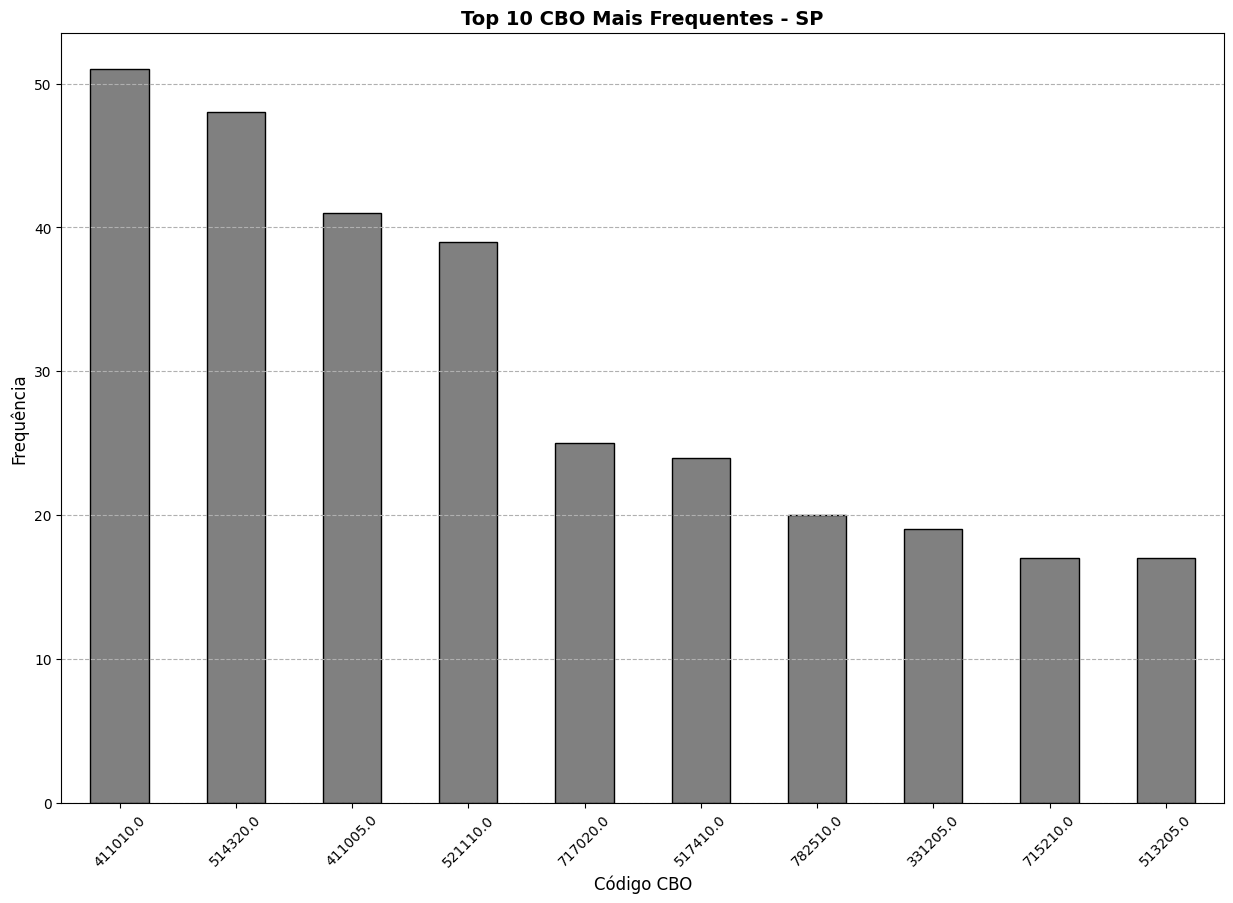

In [76]:
#criando grafico   tamanho
plt.figure(figsize=(15, 10))
#dados          tipo         cor barra               cor volta
cbo_count.plot(kind='bar', color='gray', edgecolor='black')
plt.title('Top 10 CBO Mais Frequentes - SP', fontsize=14, fontweight='bold')
plt.xlabel('Código CBO', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)

In [81]:
renda_arredondada = df['RENDA_PRESUMIDA'].round(-2)
renda = renda_arredondada.value_counts().head(12)

media_faixa = df['RENDA_PRESUMIDA'].median()
media_faixa

np.float64(1944.0)

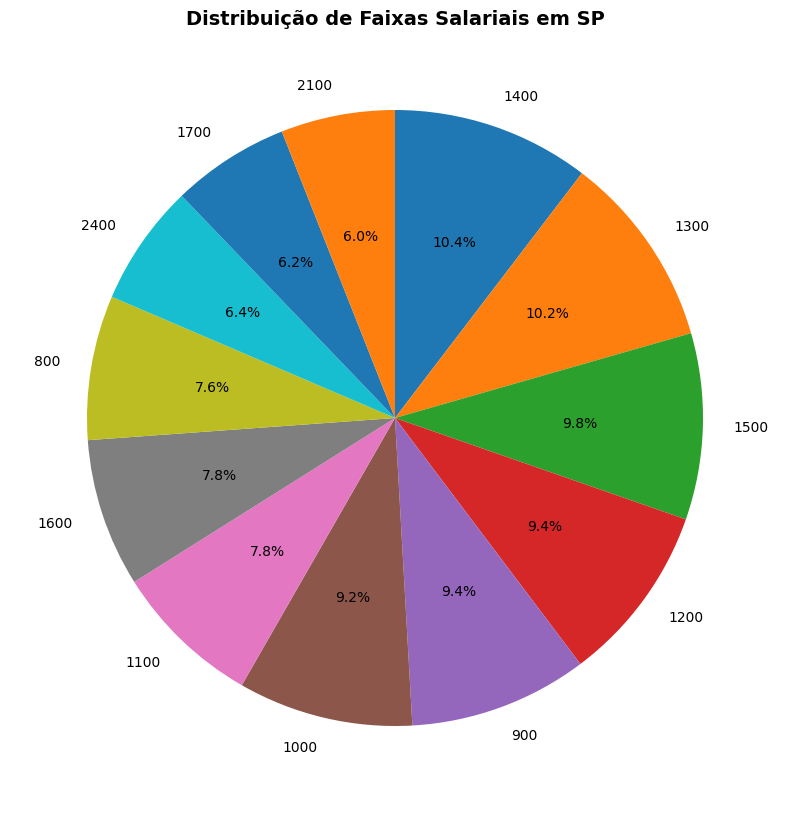

In [78]:
plt.figure(figsize=(10, 10))
renda.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribuição de Faixas Salariais em SP', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()


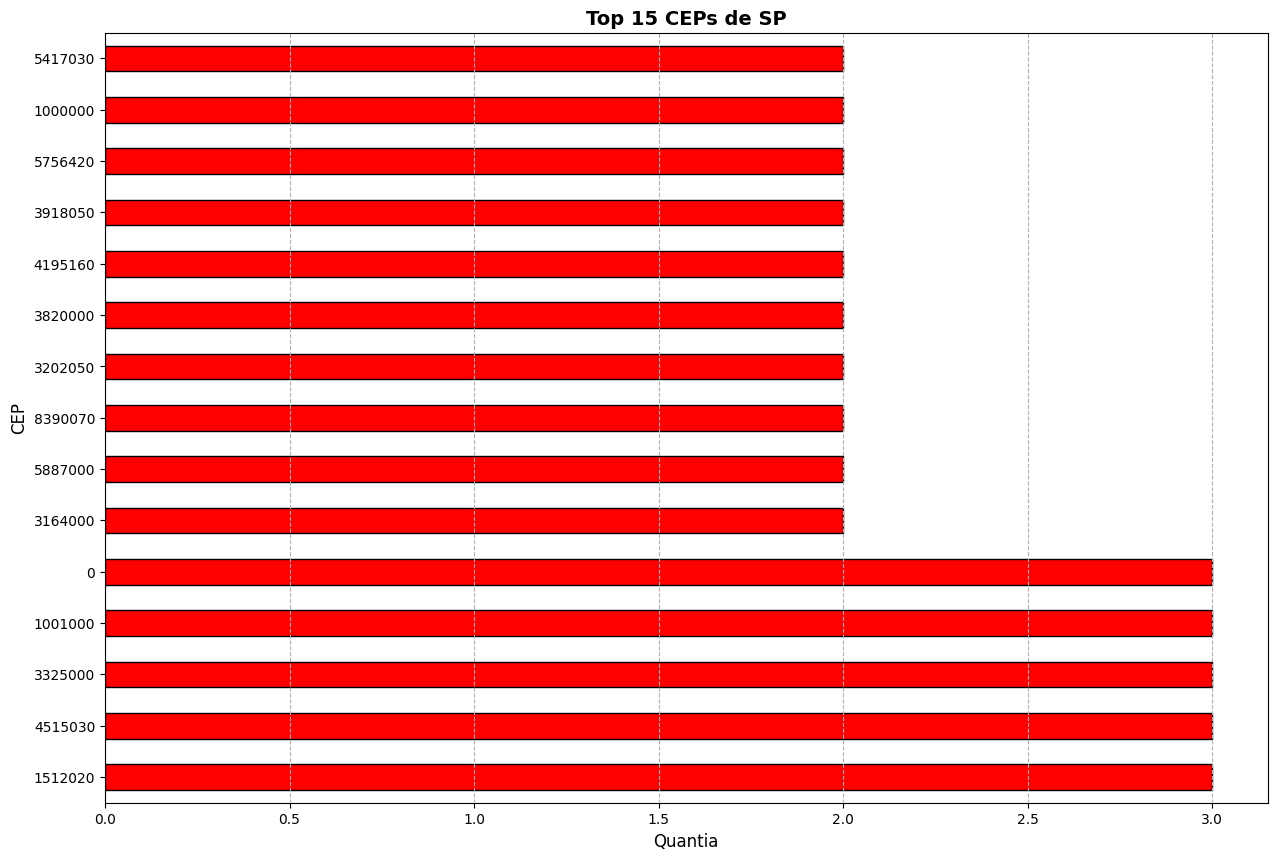

In [79]:
habitantes_cep = df['CEP'].value_counts().head(15)

plt.figure(figsize=(15, 10))
habitantes_cep.plot(kind='barh', color='red', edgecolor='black')
plt.title('Top 15 CEPs de SP', fontsize=14, fontweight='bold')
plt.xlabel('Quantia', fontsize=12)
plt.ylabel('CEP', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=1)
plt.show()


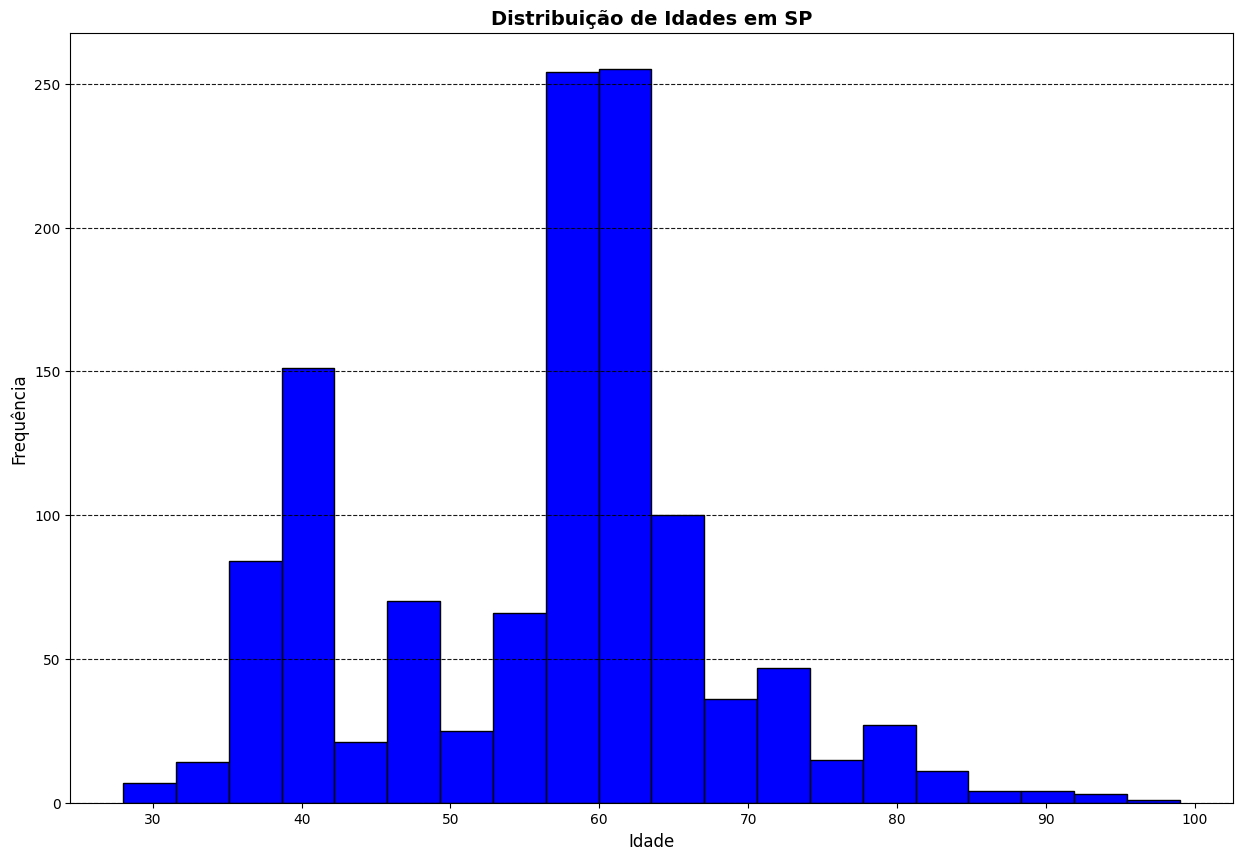

In [80]:
df['DT_NASCIMENTO'] = pd.to_datetime(df['DT_NASCIMENTO'], format='%d/%m/%Y', errors='coerce')
hoje = pd.to_datetime('today')
df['idade'] = (hoje - df['DT_NASCIMENTO']).dt.days // 365

# Plotando o histograma das idades
plt.figure(figsize=(15, 10))
plt.hist(df['idade'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Distribuição de Idades em SP', fontsize=14, fontweight='bold')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.9, color='black')
plt.show()